# Territories North America
In this notebook, I extract boundaries of America, Canada, Greenland, and Alaska. The extracted coastlines will be used in visualization and don't need to be very detailed. Many islands are omitted.

## Prerequisites
Before running this notebook, one needs to download a dataset from https://www.naturalearthdata.com/downloads/10m-cultural-vectors/. Go to the section `Admin 0 – Countries` and click the button `Download countries`. Unzip the downloaded file and put it in `datasets/naturalearthdata/`. The resulting directory structure is like

In [1]:
! tree ../datasets/naturalearthdata/

../datasets/naturalearthdata/
└── ne_10m_admin_0_countries
    ├── ne_10m_admin_0_countries.cpg
    ├── ne_10m_admin_0_countries.dbf
    ├── ne_10m_admin_0_countries.prj
    ├── ne_10m_admin_0_countries.README.html
    ├── ne_10m_admin_0_countries.shp
    ├── ne_10m_admin_0_countries.shx
    └── ne_10m_admin_0_countries.VERSION.txt

1 directory, 7 files


## The program starts here

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
gdf = gpd.read_file('../datasets/naturalearthdata/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')

In [4]:
boundaries = [
    np.array(gdf[gdf['SOVEREIGNT'] == country]['geometry'].iat[i].boundary.geoms[j].xy)
for country, i, j in [
    ('United States of America', 0, 0),
    ('United States of America', 0, 1),
    ('Canada', 0, 0),
    ('Denmark', 1, 0),
]]

Here plots the extracted boundaries.

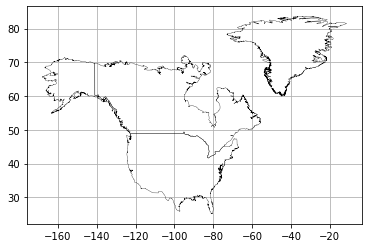

In [5]:
fig, ax = plt.subplots()
for bound in boundaries:
    ax.plot(bound[0], bound[1], c='black', linewidth=.3)
# ax.set_aspect('equal')
ax.grid();

Here saves the extracted boundaries as a file for later usage.

In [6]:
with open('../repository/territories_north_america.npy', 'wb') as f:
    for bound in boundaries:
        np.save(f, bound)

The program ends here.

## Environment

In [8]:
import sys, os, subprocess
print('I run this jupyter notebook in a conda environment called ', end='')
print(sys.executable.split('/')[-3])
filename = 'coastlines_near_taiwan.ipynb'
subprocess.check_output([
    'pipreqsnb', '--use-local', '--print', 
    os.path.join(os.getcwd(), filename)
]).decode().strip().split('\n')[:-1]

I run this jupyter notebook in a conda environment called spatial


INFO: Successfully output requirements


['geopandas==0.10.2', 'matplotlib==3.4.3', 'numpy==1.21.4']